Link to Streamlit application: https://ind320-tereseivesdal.streamlit.app/

Link to Github repository: https://github.com/teresemyhre/IND320-tereseivesdal

## AI usage
I have used AI as a practical assistant in my work. For example, I have used ChatGPT to get guidance on programming tasks, debugging, Git version control, and deploying applications with Streamlit. In addition, I have used GitHub Copilot as coding support directly in VS Code, where it helps me generate code suggestions and speed up development. Together, these tools have helped me solve concrete problems more efficiently and improve my workflow.

## Load the data

In [53]:
import pandas as pd

## Reading and exploring the data

In [32]:
# Read the data from a CSV file from the `data/` folder (not for streamlit app)
df = pd.read_csv("data/open-meteo-subset.csv")

# Show the first 5 rows of the dataframe
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [33]:
# Show summary statistics of the dataframe
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


In [34]:
# Show info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


We can see that we need to convert time from *object* to *datetime*. 

In [35]:
df["time"] = pd.to_datetime(df["time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


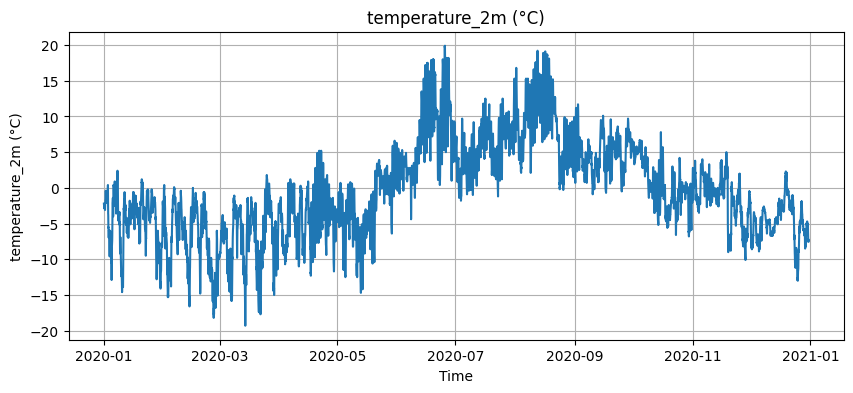

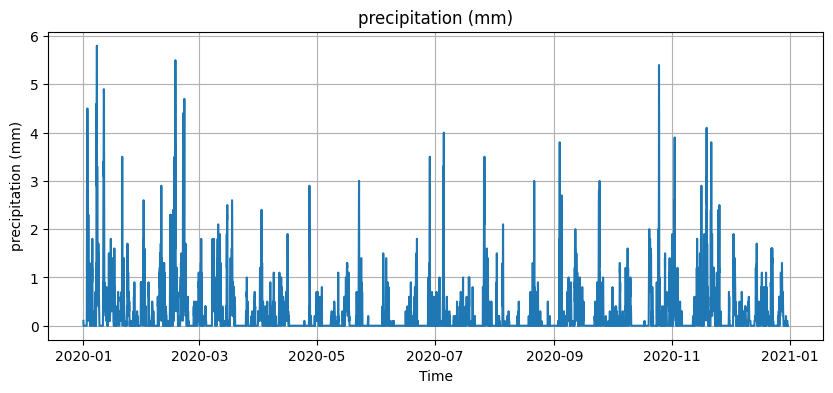

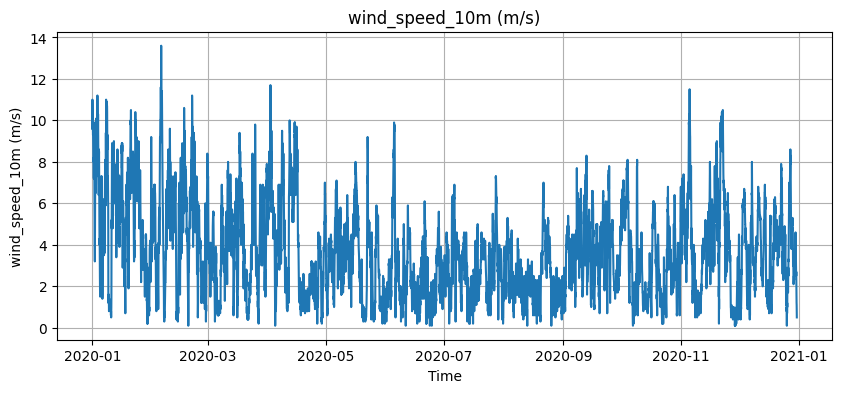

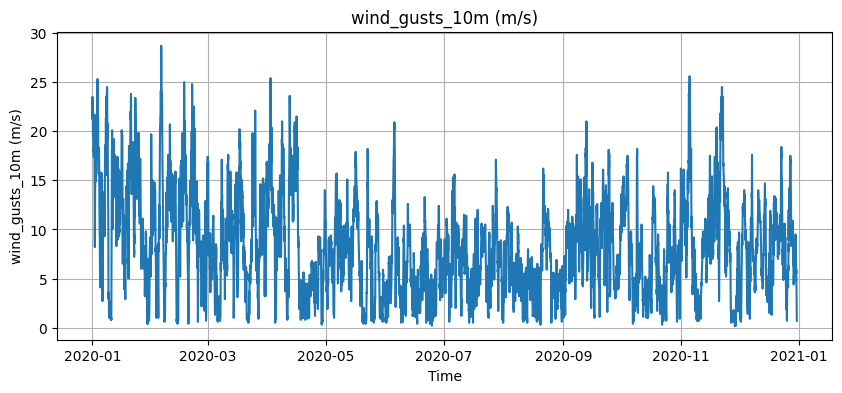

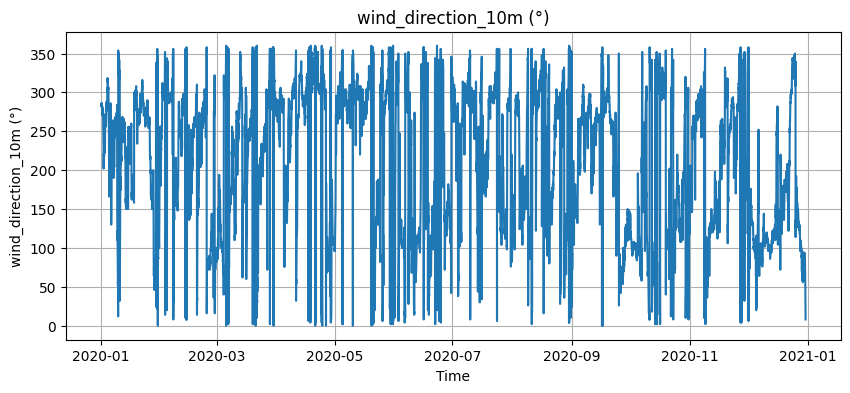

In [30]:
import matplotlib.pyplot as plt

for column in df.columns.drop("time"):
    plt.figure(figsize=(10,4))
    plt.plot(df["time"], df[column])
    plt.title(column)
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

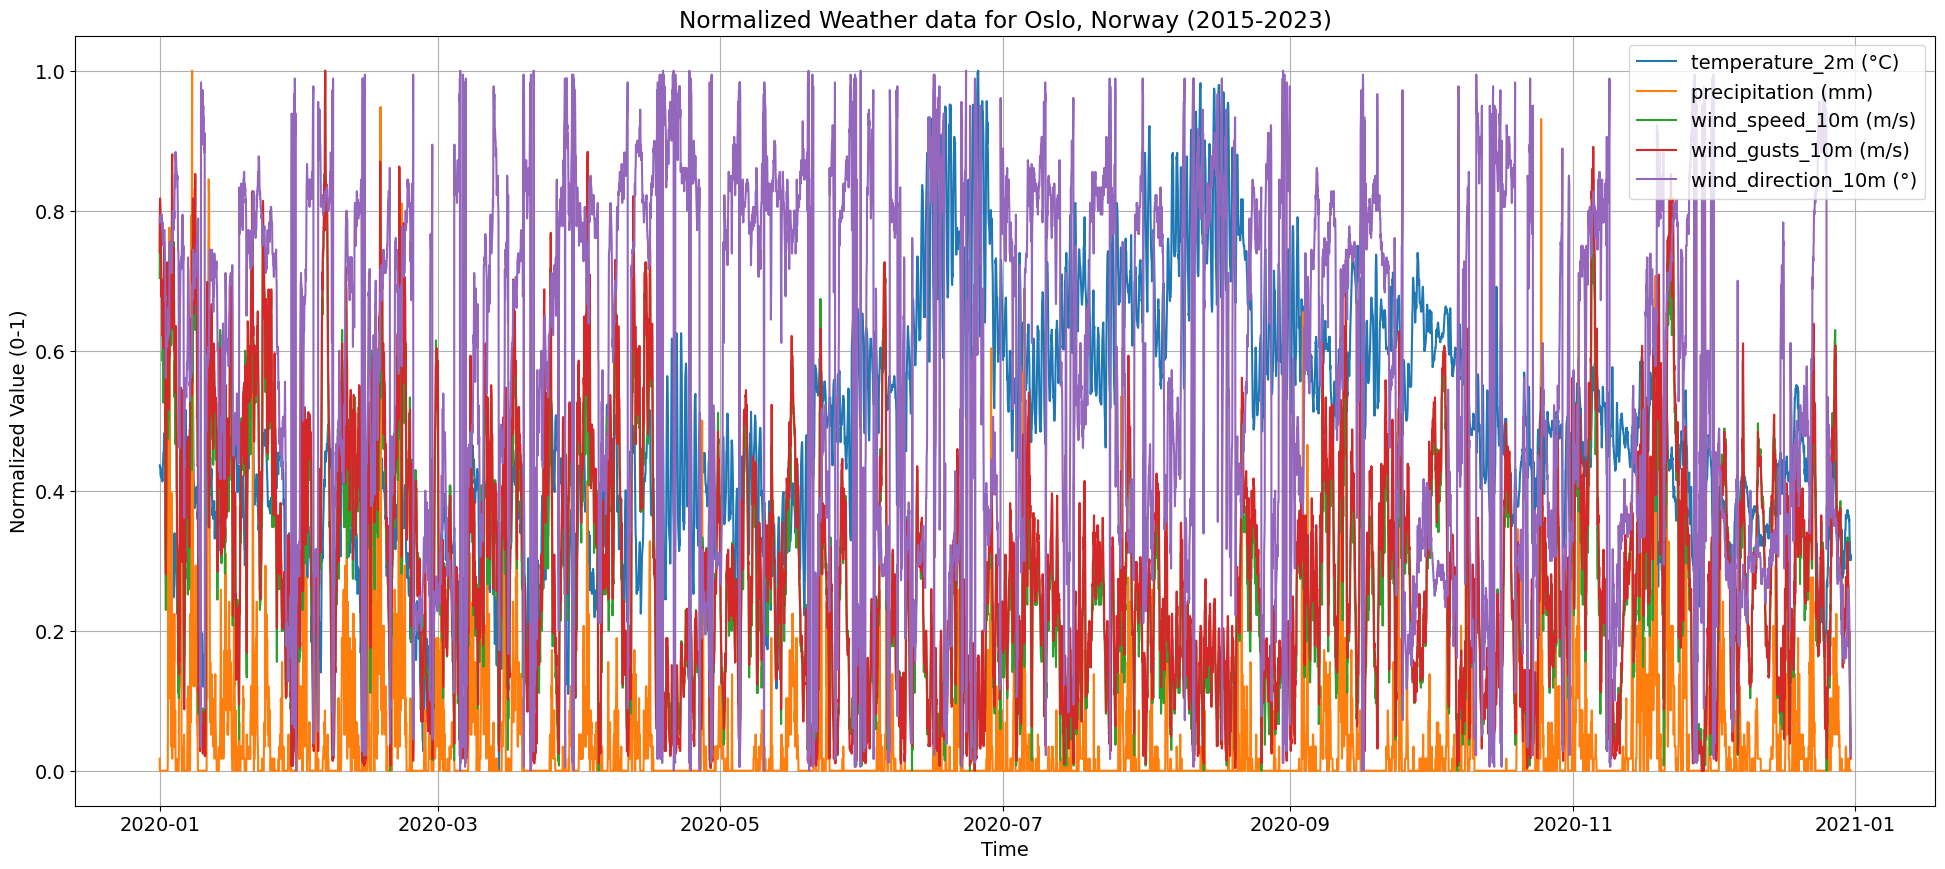

In [64]:

# As we can see from the plots above, the scales are very different. We can normalize the data to a 0-1 range for better comparison.
# Normalizing to 0-1 range
df_normalized = df.copy()
for column in df.columns.drop("time"):
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
# Plot normalized data
plt.figure(figsize=(24,10))
for column in df_normalized.columns.drop("time"):
    plt.plot(df_normalized["time"], df_normalized[column], label=column)
plt.rcParams.update({'font.size': 14})
plt.title("Normalized Weather data for Oslo, Norway (2015-2023)")
plt.xlabel("Time")
plt.ylabel("Normalized Value (0-1)")
plt.legend()
plt.grid(True)
plt.show()      

This plot shows lineplots for all columns on the same scale after normalization. Another approach could be to use two y-axes, since four of the columns are on a similar scale, while one is on a completely different scale.

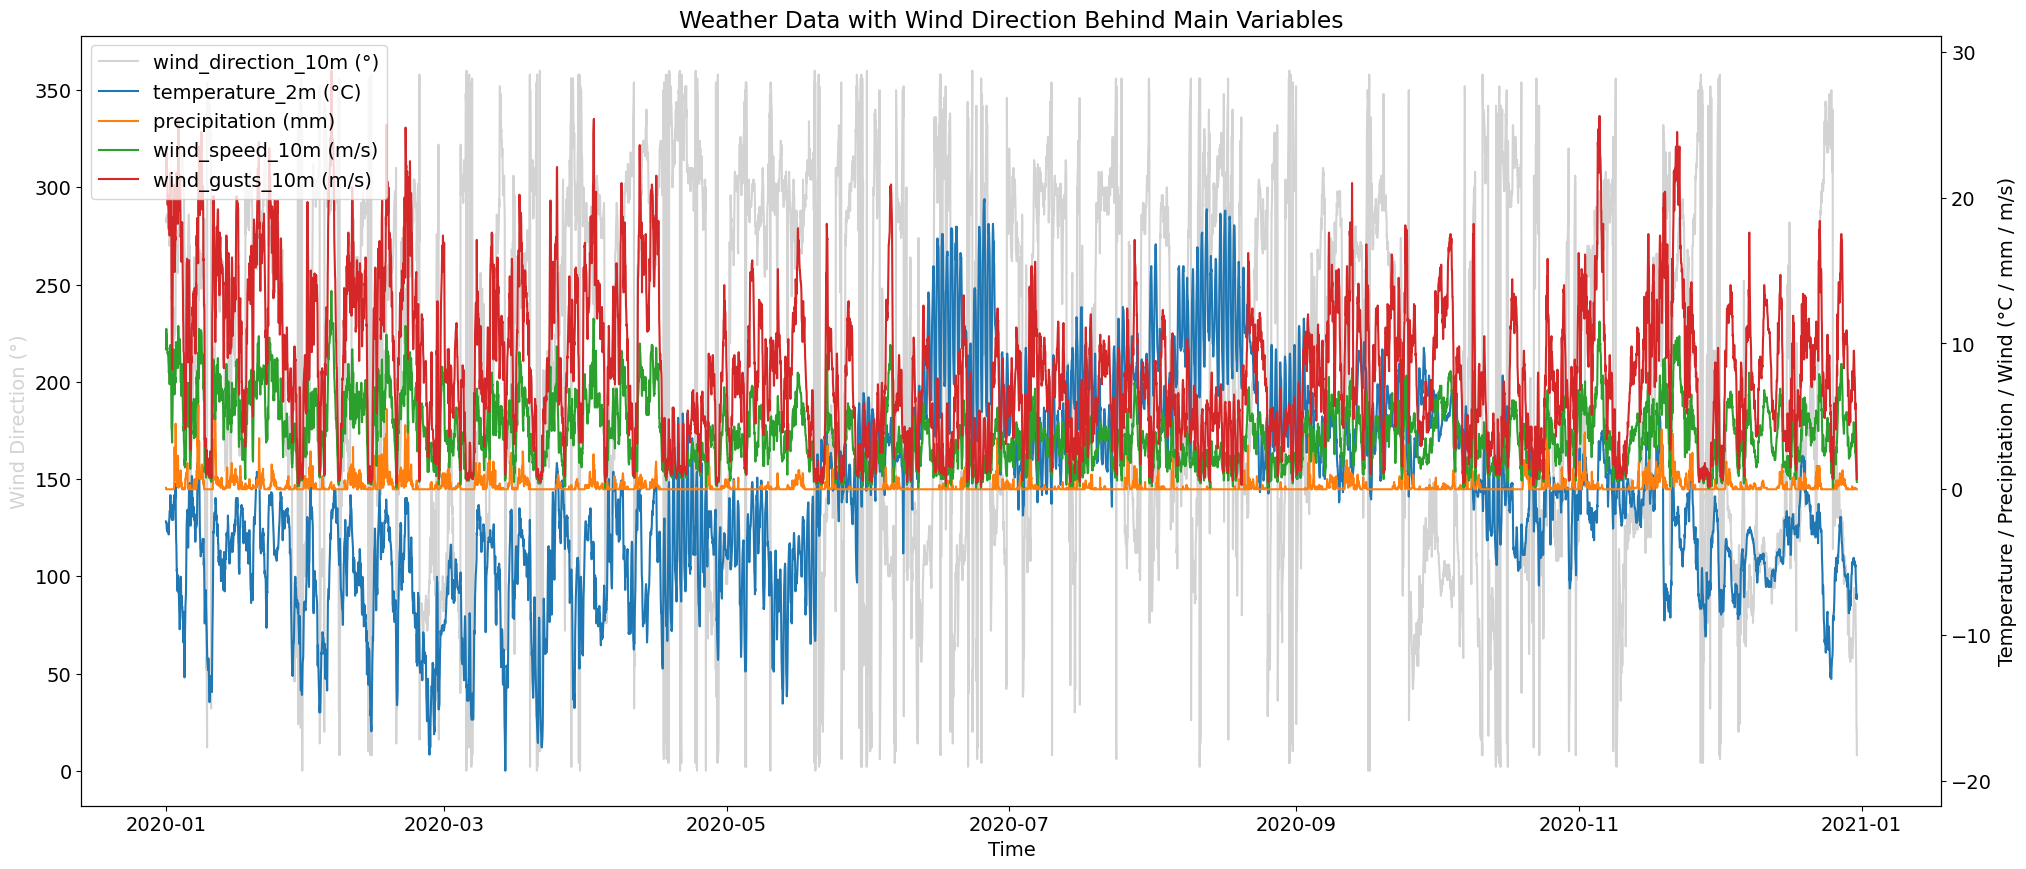

In [61]:
import pandas as pd
import matplotlib.pyplot as plt


# Columns for main y-axis
cols_main = ["temperature_2m (°C)", "precipitation (mm)", "wind_speed_10m (m/s)", "wind_gusts_10m (m/s)"]
# Wind direction column
col_wind = "wind_direction_10m (°)"

fig, ax = plt.subplots(figsize=(24,10))

# Plot wind direction first, lightly
ax.plot(df["time"], df[col_wind], color="lightgray", label=col_wind, zorder=0)

# Create twin axis for main variables
ax2 = ax.twinx()

# Plot main columns on top
for col in cols_main:
    ax2.plot(df["time"], df[col], label=col, zorder=1)

# Axis labels
ax.set_xlabel("Time")
ax.set_ylabel("Wind Direction (°)", color="lightgray")
ax2.set_ylabel("Temperature / Precipitation / Wind (°C / mm / m/s)")

# Combine legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title("Weather Data with Wind Direction Behind Main Variables")
plt.show()

Here we can see that Wind direction has its own y-axis, and the orthers share. Both normalizing and using 2 y-axes is usefull for looking at data that has different scales. 

---


I didn’t fully understand how to use Jupyter Notebook, so instead I worked by making changes directly in the Streamlit pages and then viewing the updates on the localhost page after saving. Once satisfied with the results, I pushed the changes to the GitHub repo. To make this workflow smoother, I added [server] runOnSave=true to the config.toml file.

## Word log

Started with creating the repository on Github, and then I created a simple file structure. I created the python filed called streamlit_app.py and added simple Streamlit title and write function to check if deploying works.

Then onto reading and exploring the data in the Jupyter notebook. I read the file and inspected the data, following up with separate line plots, and then all normalized columns in one plot. Normalizing helped me observe relationships and differences in scale across the variables. 

The next step was to create three pages on Streamlit. I struggled with creating the pages, as there were some incompatibilities in the Python version I used (3.12.0) and the default one on the settings at Streamlit (3.13.0). I changed them to both be 3.12.0. Then there still were some troubles as I had chosen the names of my pages to be 02_page.py and 03_page.py, but Streamlit wants different names for the different files as the filenames become the title of the pages on the app. 

Then I moved on to filling in the second page. Initially, I had some troubles understanding how to do this task, and it took some tries to get to the right structure of the table, for example I struggled with the time column, as it gave me a key error, and then all my lineplots got straight. At last, I added an if statement to continue if the column is time. 

Next, I filled in the third page. Pretty quickly I got a working page with some of the right functionalities, but the plot was missing a header, so I had to add that. I did that using “st.header()”, but it gave the title “Month 1” and so on, so I had to fix that using “.iloc[0].strftime("%B")”. Then I realized that the slider I had, only chose one month at a time, so I needed to change that to be able to choose a subset of the months. Lastly, I changed the header to be centered.

In the end, I also set up a theme for the Streamlit app so that all pages would look consistent. I added a config.toml file in the .streamlit folder, where I defined the base theme, primary color, and background colors. This way, the design looks cleaner, and I only need to change the colors in one place if I want to update the style later. I also created utils.py to set colors for each plot.
